data pre

Compute the predictive distribution of every input data sequentially, where each input data is taken randomly from the noise data. Show your best prediction results for all 50 data one by one:

In [33]:
import numpy as np
import math 
import matplotlib.pyplot as plt
from scipy import linalg
import random

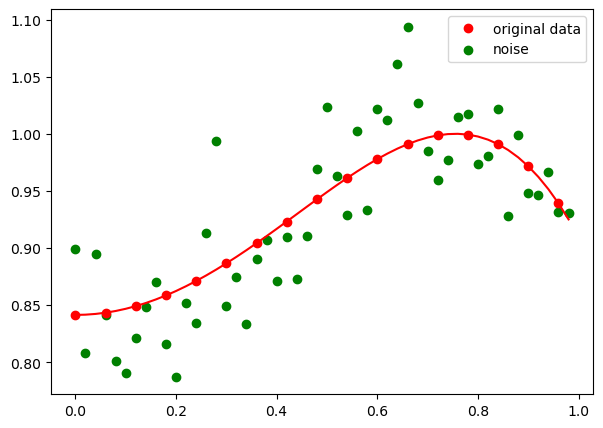

In [34]:
#data preparation
x = np.arange(0,1,0.02)
y = np.sin(x**2 + 1)
sigma = 0.04 #0.02
noise = np.random.normal(0,sigma,len(x))
y_noise = y+noise
plt.figure(figsize = (7,5))
plt.plot(x,y,'or',markevery = 3,label = 'original data')
plt.plot(x,y,'red')
plt.scatter(x,y_noise,color = 'green',label = 'noise')
plt.legend(loc='best')

In [35]:
def cal_fi_col_pred(x_seq,s,u):
    # calculate FI by columns
    fik_col_pred = np.exp(-(x_seq-u)**2/2/s**2)
    #print('columns:\n',fik_col_pred)
    return fik_col_pred

def cal_cap_fi_pred(x_seq,M,s,um):
    cap_fi = np.zeros((len(x_seq),M))
    #t_mle = np.zeros((N,1))

    for i in range(M):
        #for j in range (M):
        if i ==0:
            cap_fi[:,i] = 1
        else:
            cap_fi[:,i] = cal_fi_col_pred(x_seq,s,um[i-1])
    return cap_fi

In [36]:
def predictive_dis(beta, x, ssn, w, s, M, n) -> list:
    N = len(x)
    phi = np.zeros([N,M])
    sx = np.zeros(50) # variance of t*
    Mx = np.zeros(50) # mean of t*
    FI_pred = cal_cap_fi_pred(x,M,s,um)
    for nn in range(N):                            
        sx[nn] = 1.0/beta + np.dot(np.dot(FI_pred[nn, :], ssn[n]), FI_pred[nn, :].T)
        Mx[nn] = np.dot(w[n].T, FI_pred[nn, :].T)
    
    return sx, Mx
    

In [37]:
def cal_pred(x_seq,M,s,um,beta,alpha,ssn_last,w_last):
    # calculate t_bar
    t_bar = y_noise_seq
    Sn = []
    # calculate FI
    FI_pred = cal_cap_fi_pred(x_seq,M,s,um)
    #print('FI_pred:\n  ',FI_pred)
    if len(x_seq) == 1:
        # calculate ssn
        ssn = linalg.inv(alpha*np.identity(M)+beta*np.dot(FI_pred.T,FI_pred))
        w_bar = beta * np.dot(ssn,np.dot(FI_pred.T,t_bar))
        #print('w_bar shape:  ',np.shape(w_bar))
    else:
        ssn = linalg.inv(linalg.inv(ssn_last)+beta*np.dot(FI_pred.T,FI_pred))  # ssn dim = M*M
        w_bar = np.dot(ssn,(np.dot(linalg.inv(ssn_last),w_last)+beta*np.dot(FI_pred.T,t_bar))) # w_bar dim = M*1
    #var_n_sq = 1/beta + np.dot(np.dot(FI_pred,SN),FI_pred.T)
    y_pred = np.dot(FI_pred,w_bar)
    return ssn, w_bar, y_pred

In [38]:
#w_bar[12].shape

C:\Users\12\AppData\Local\Temp\ipykernel_14424\1343106385.py:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  plt.plot(x_seq,y_pred[-1],'go',color = 'blue',label = 'predictive dist,x sequence length %s'%(i+1))
C:\Users\12\AppData\Local\Temp\ipykernel_14424\1343106385.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (8,5))


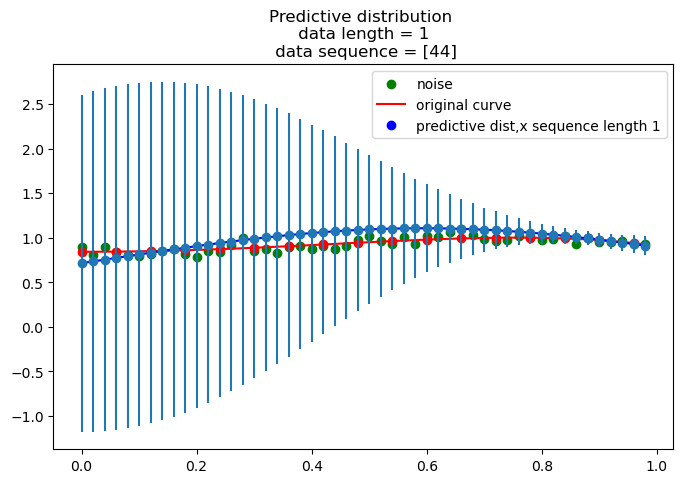

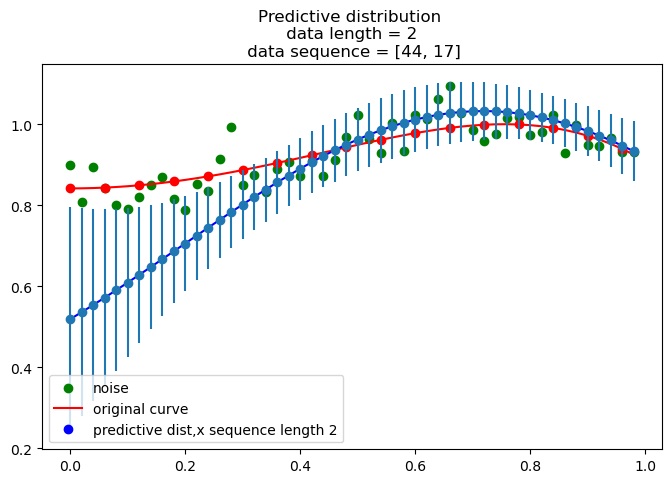

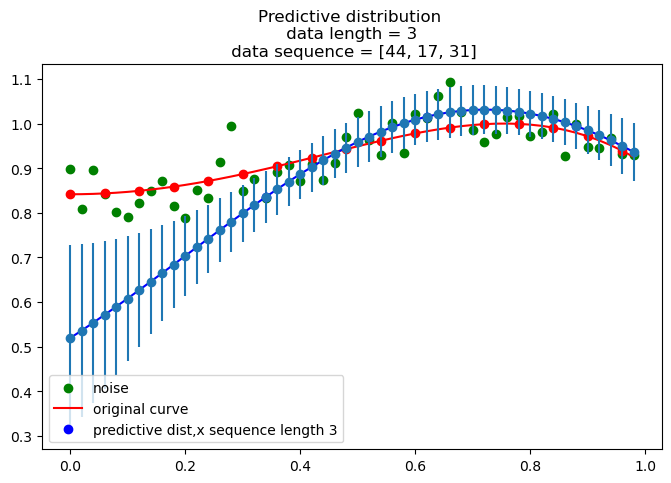

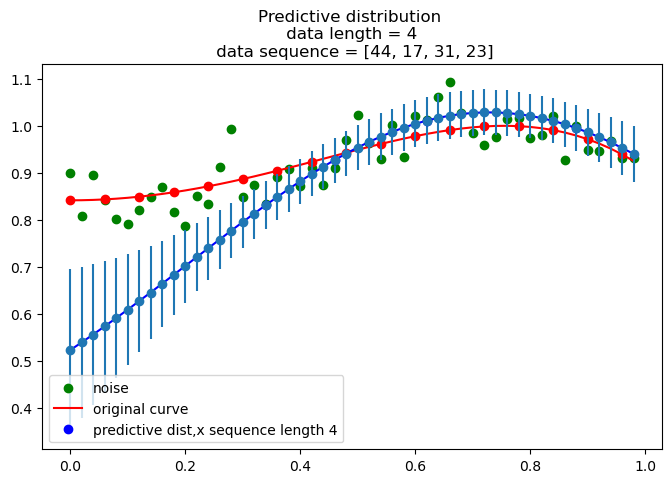

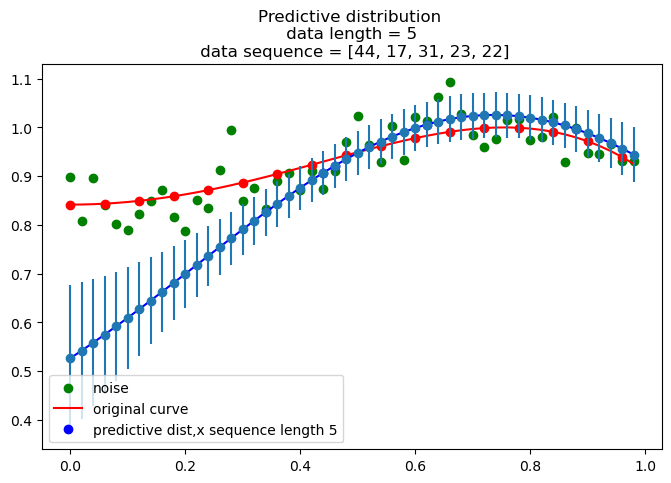

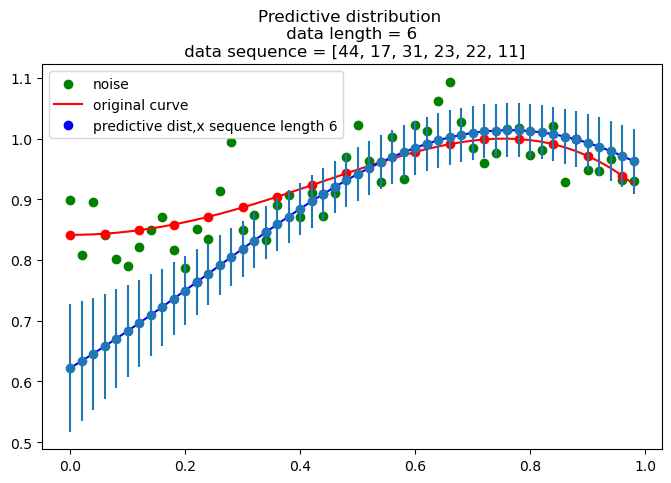

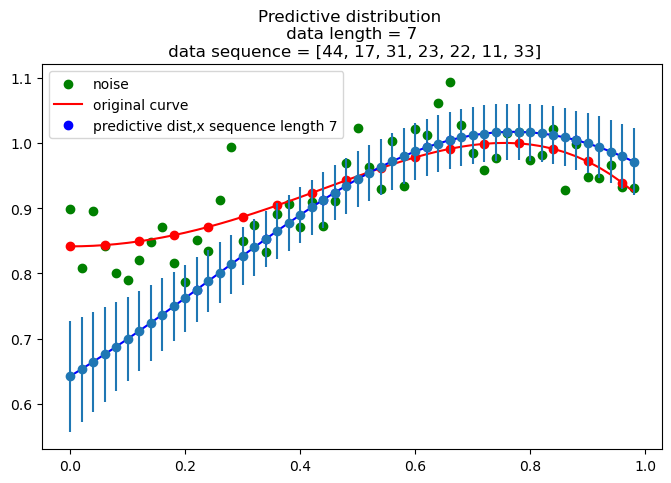

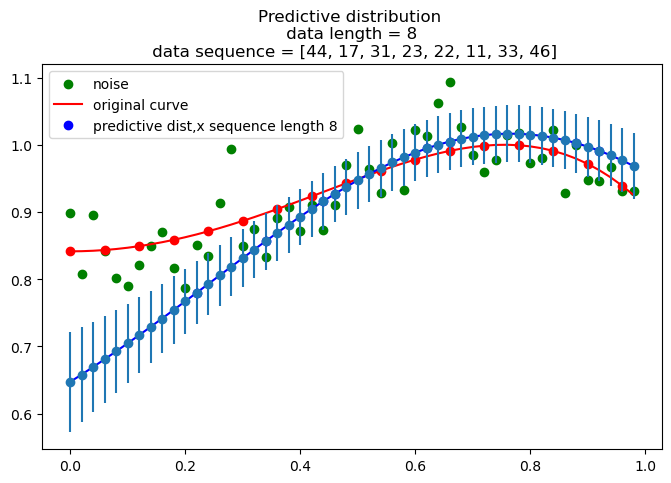

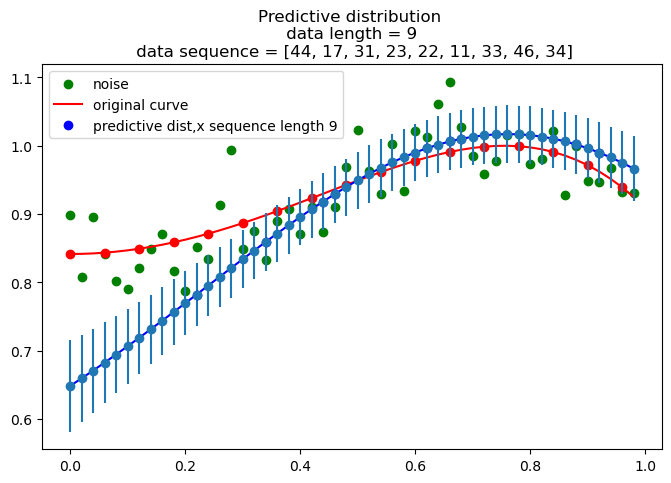

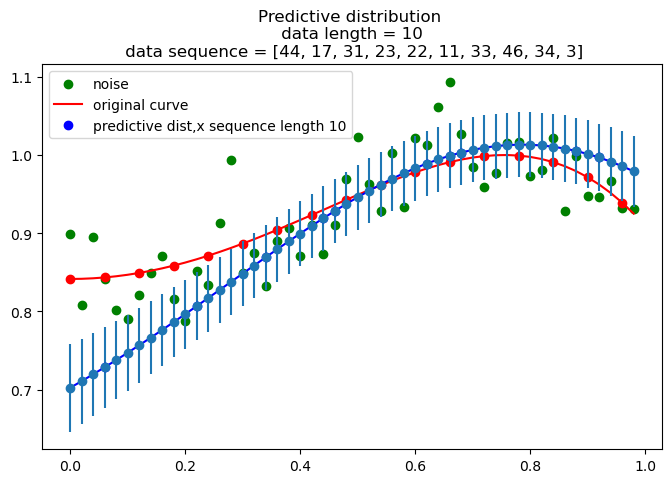

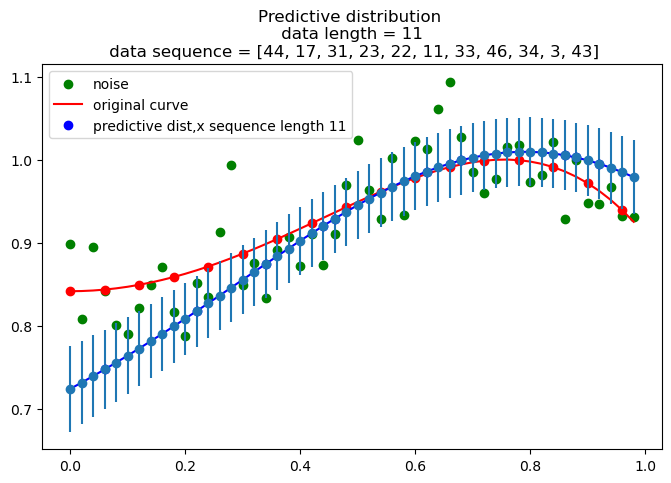

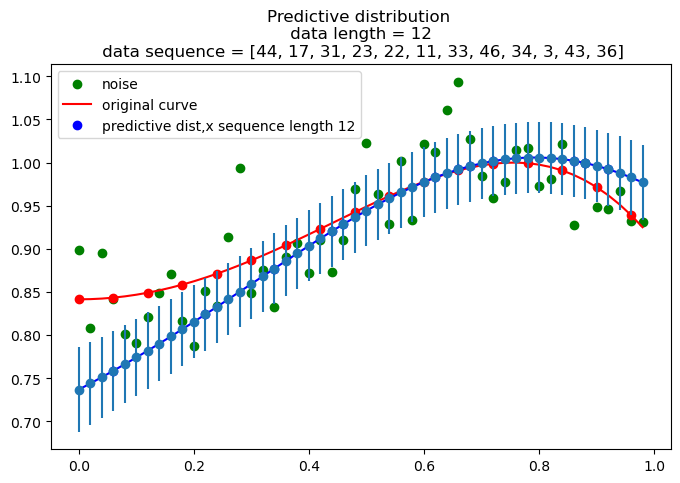

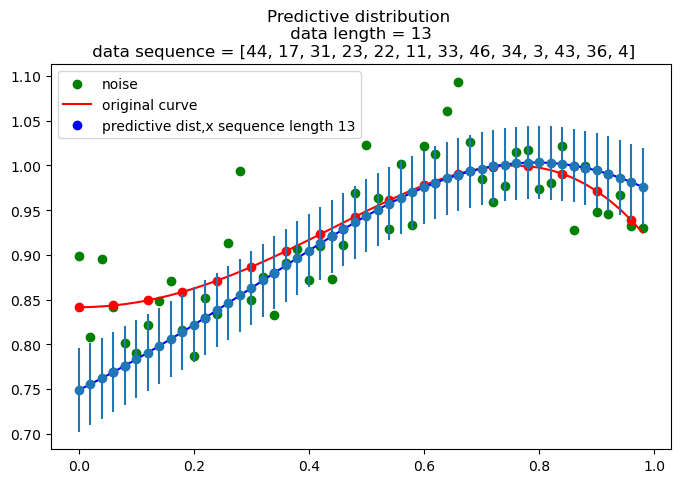

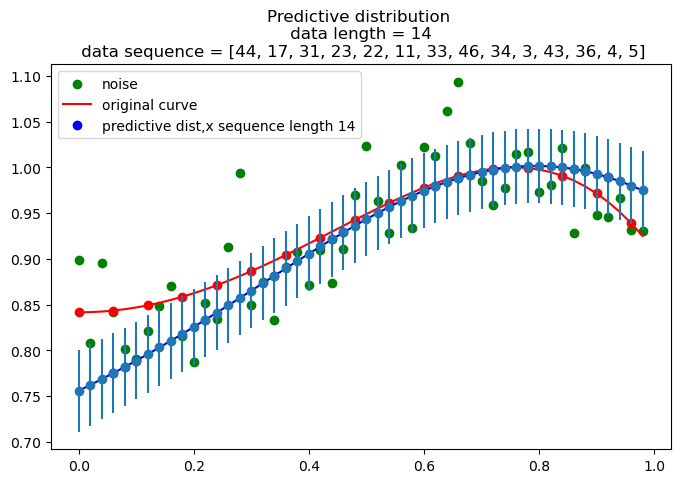

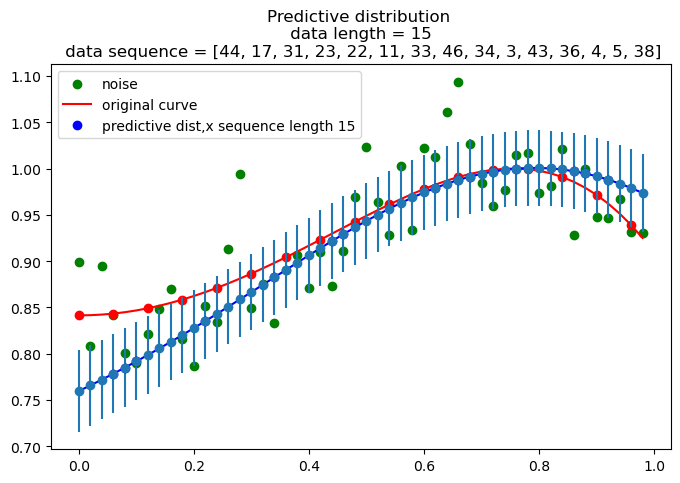

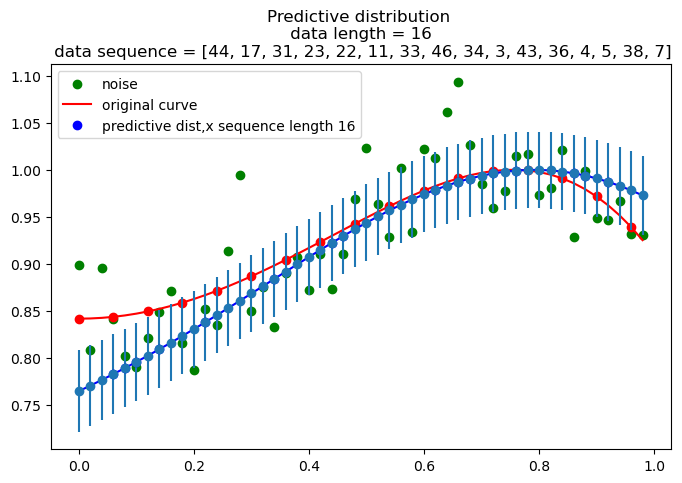

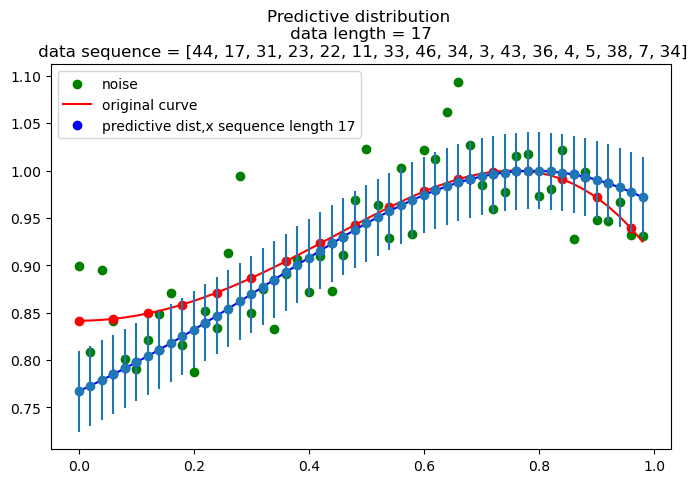

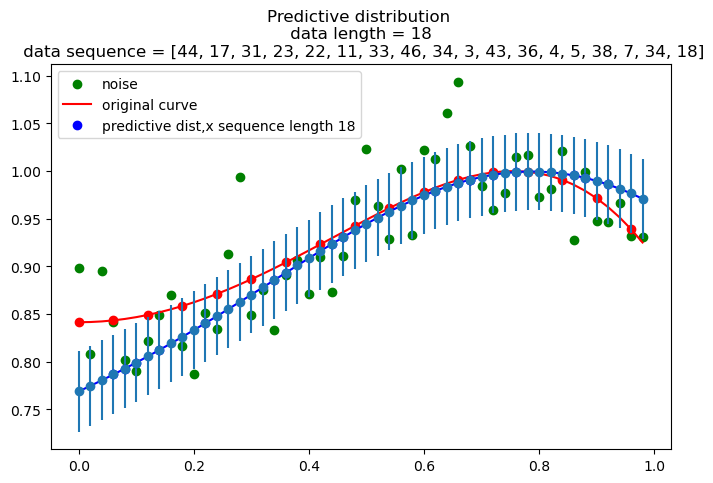

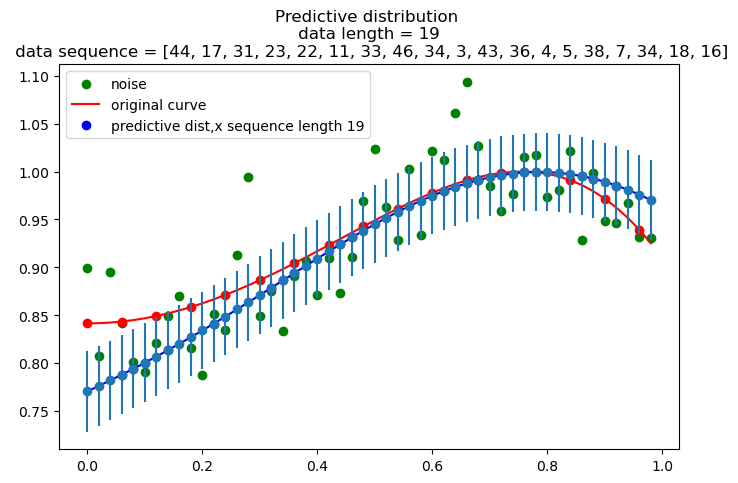

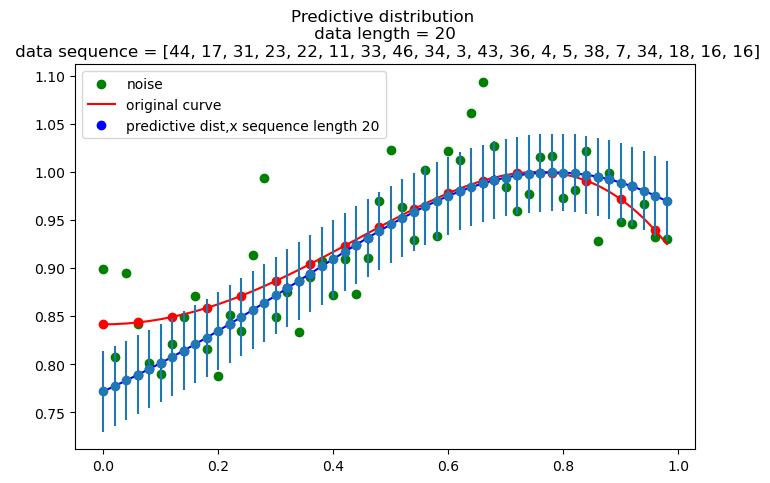

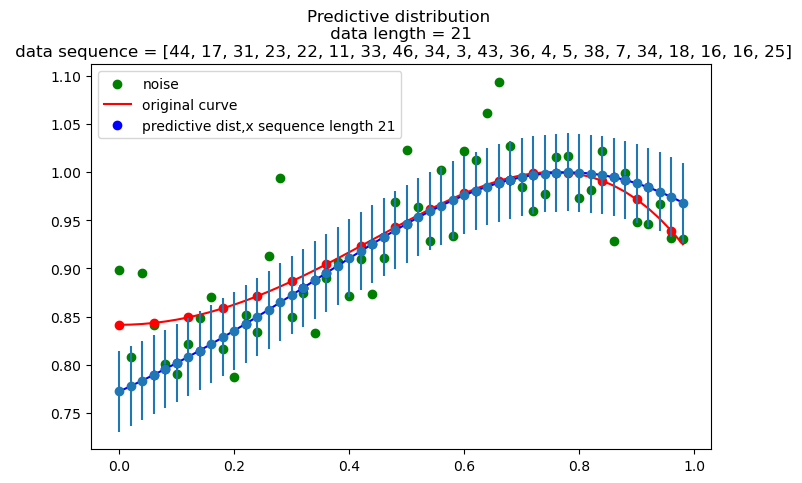

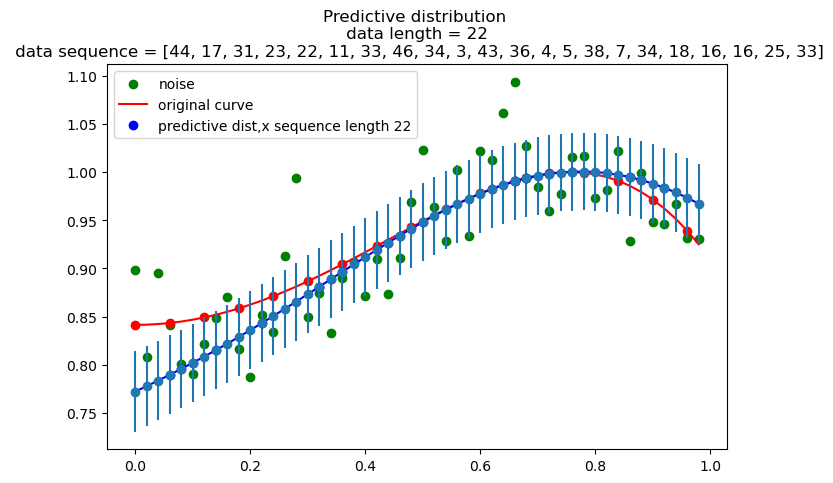

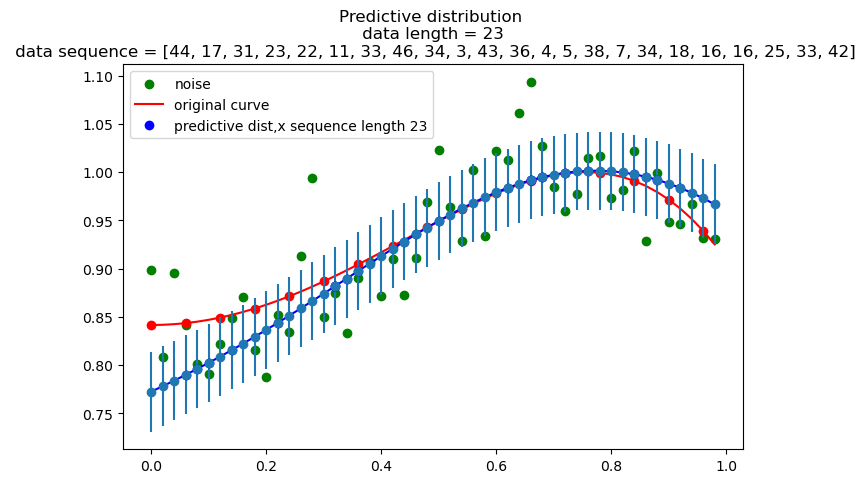

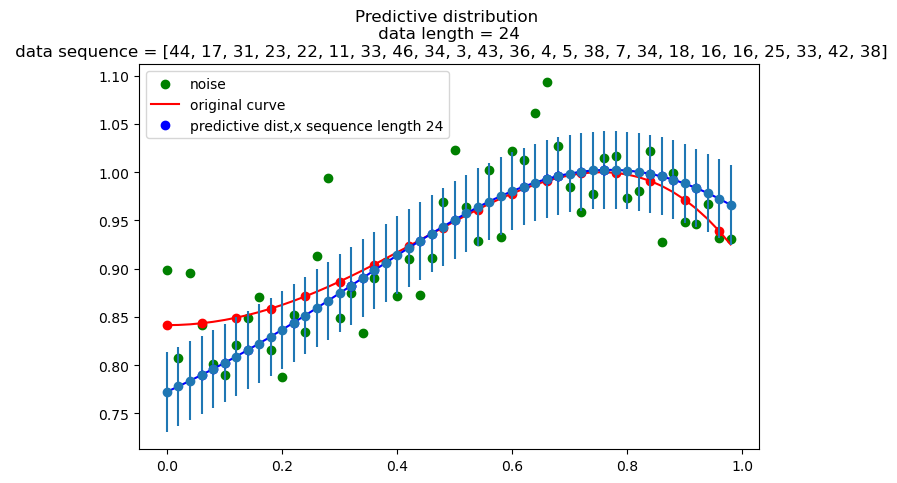

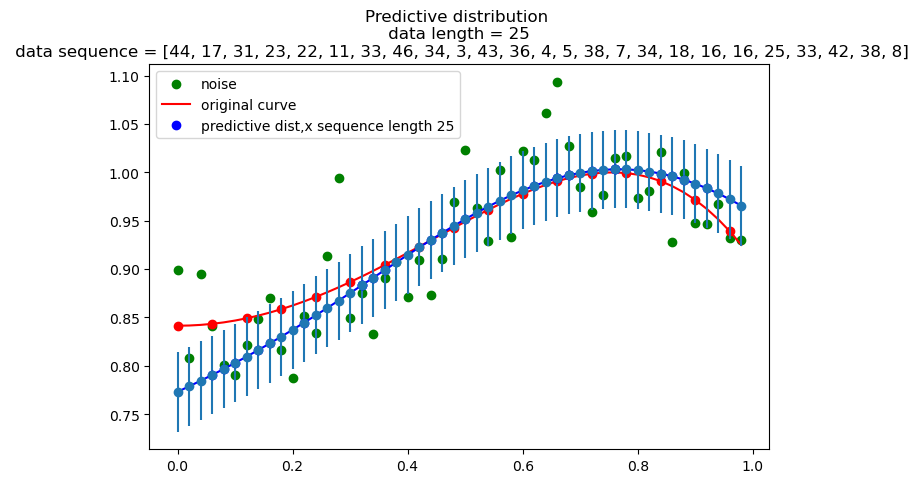

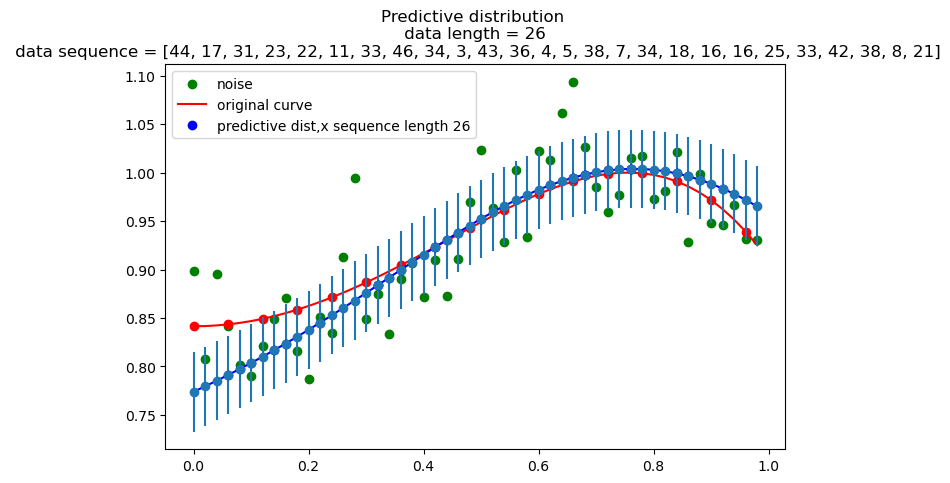

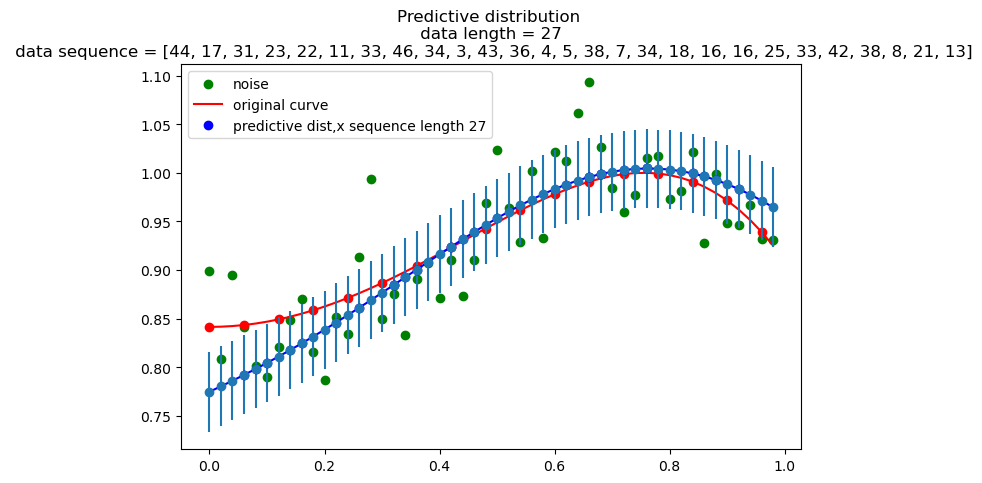

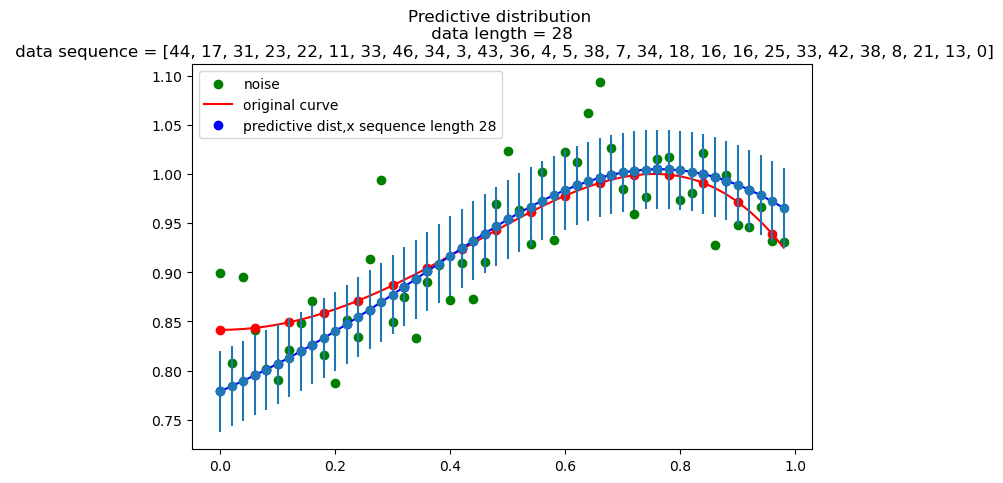

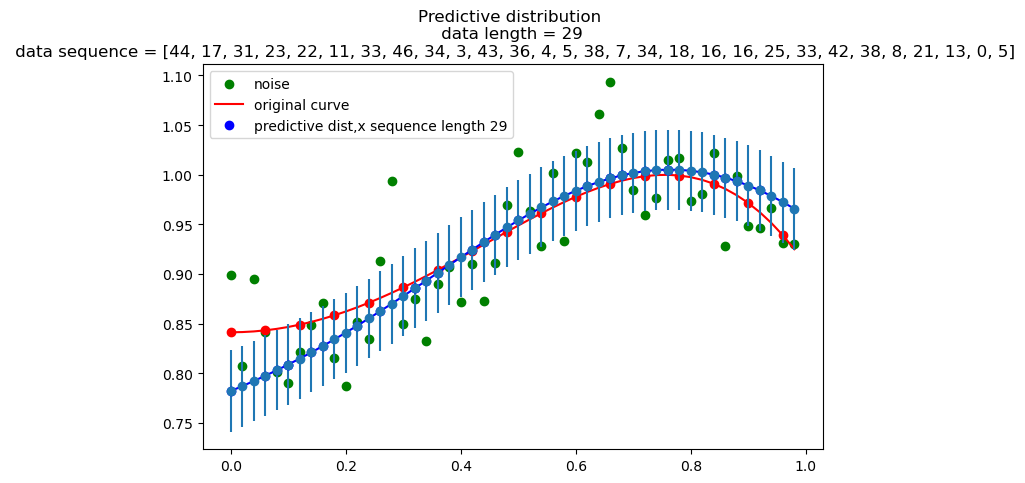

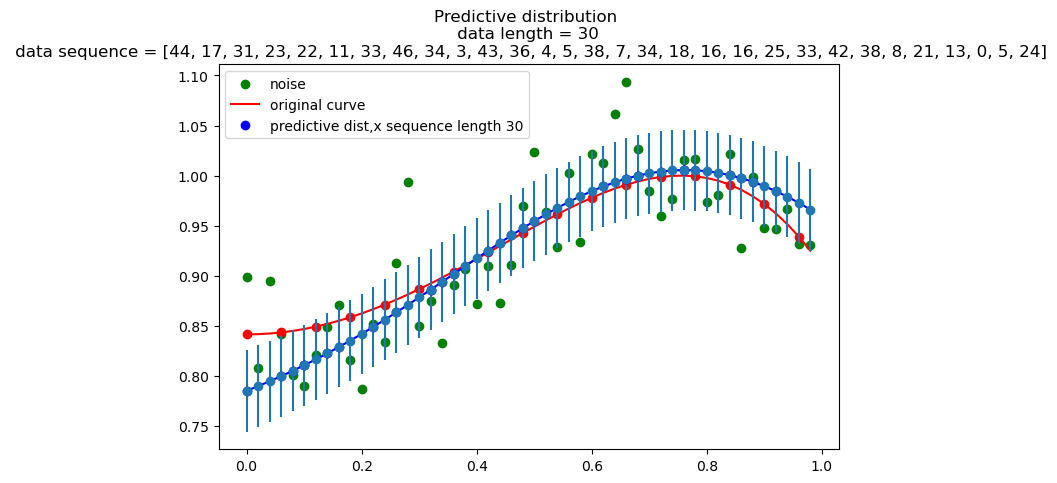

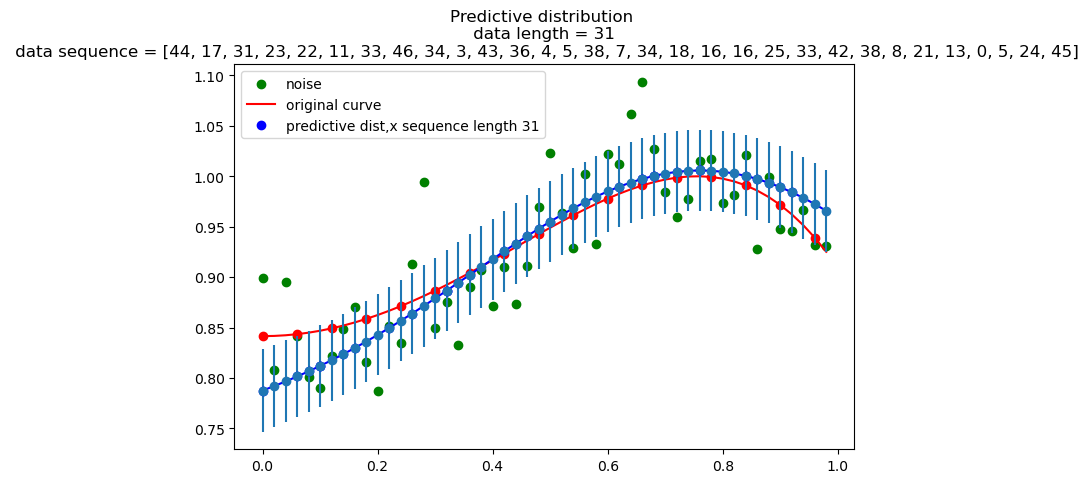

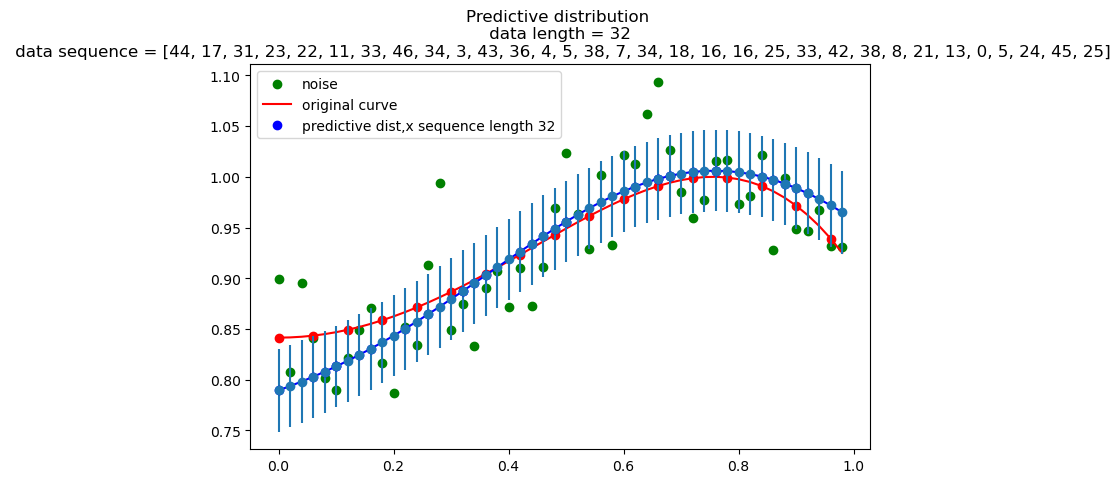

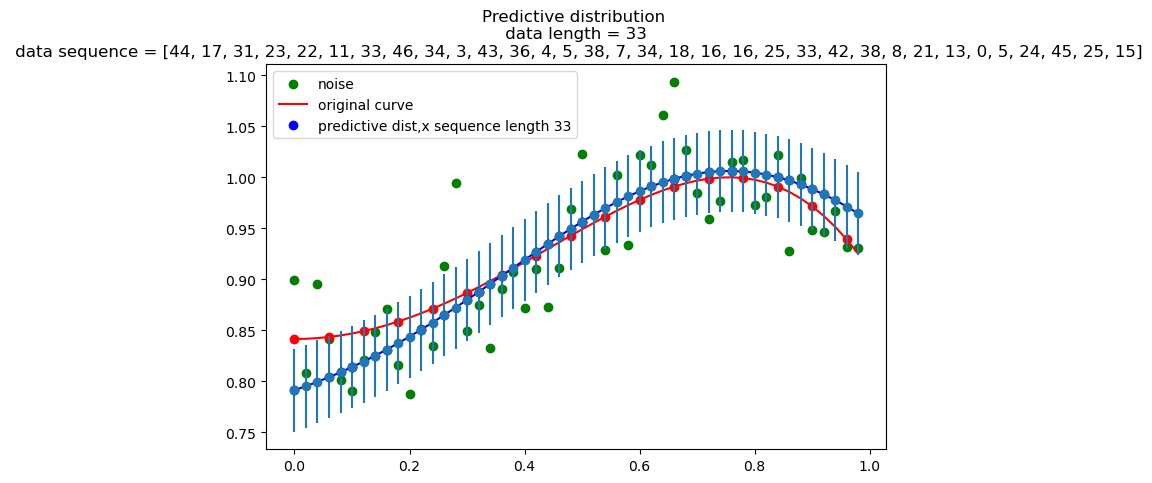

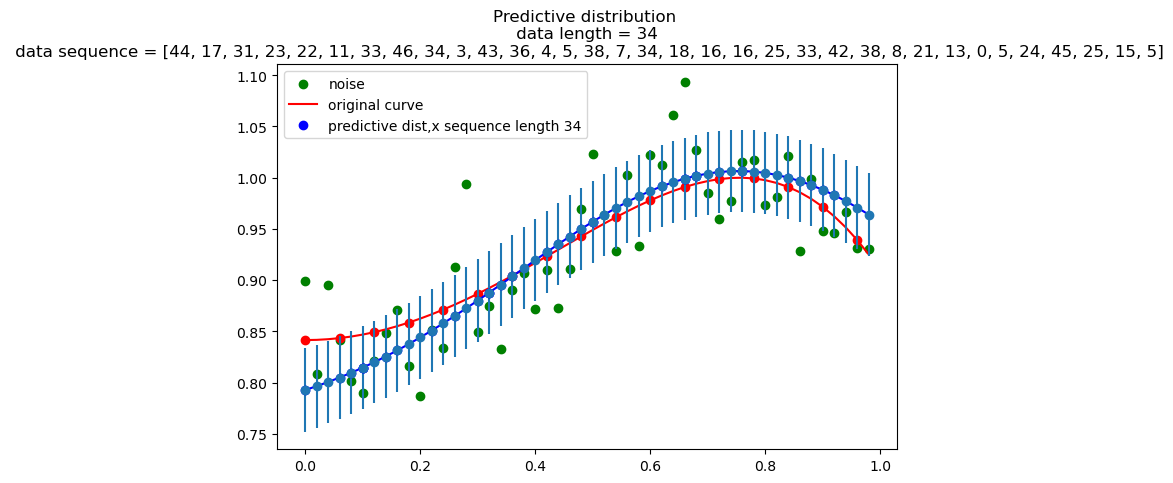

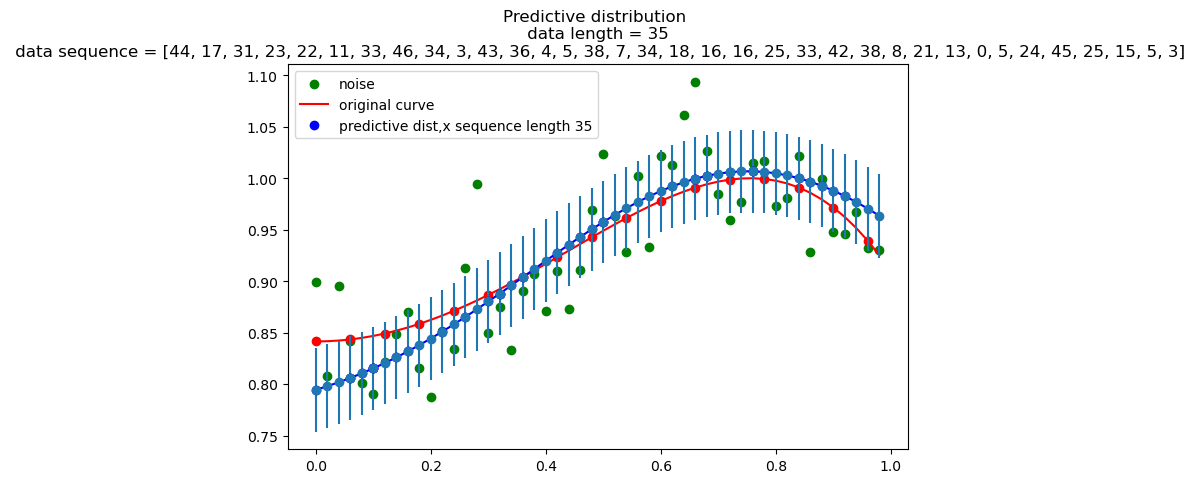

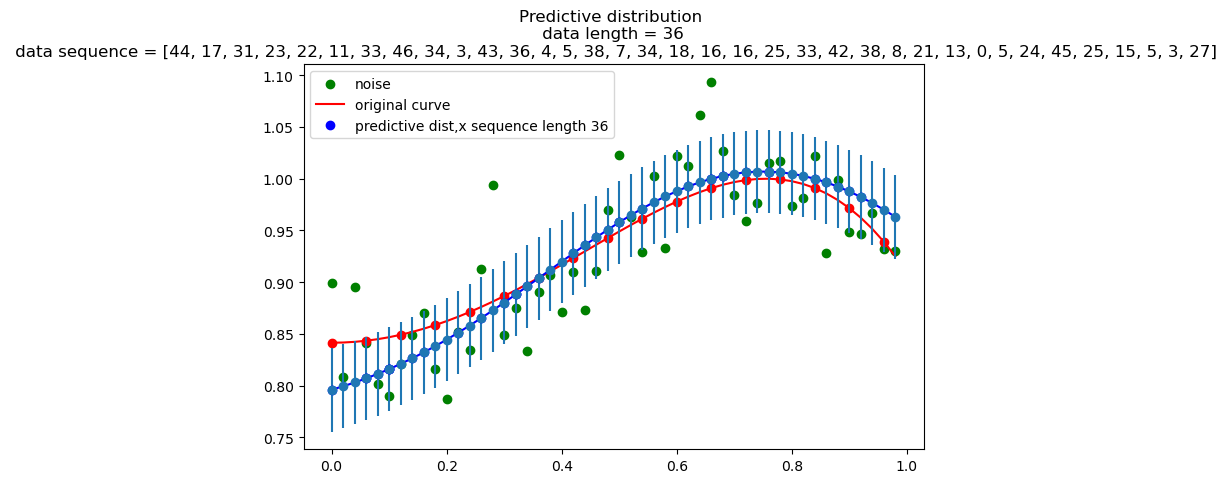

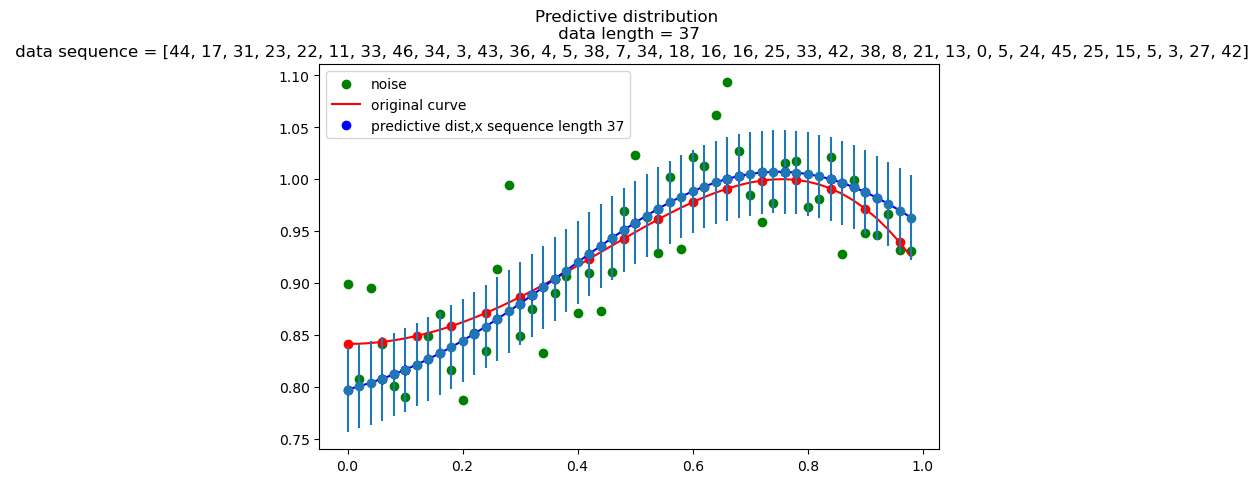

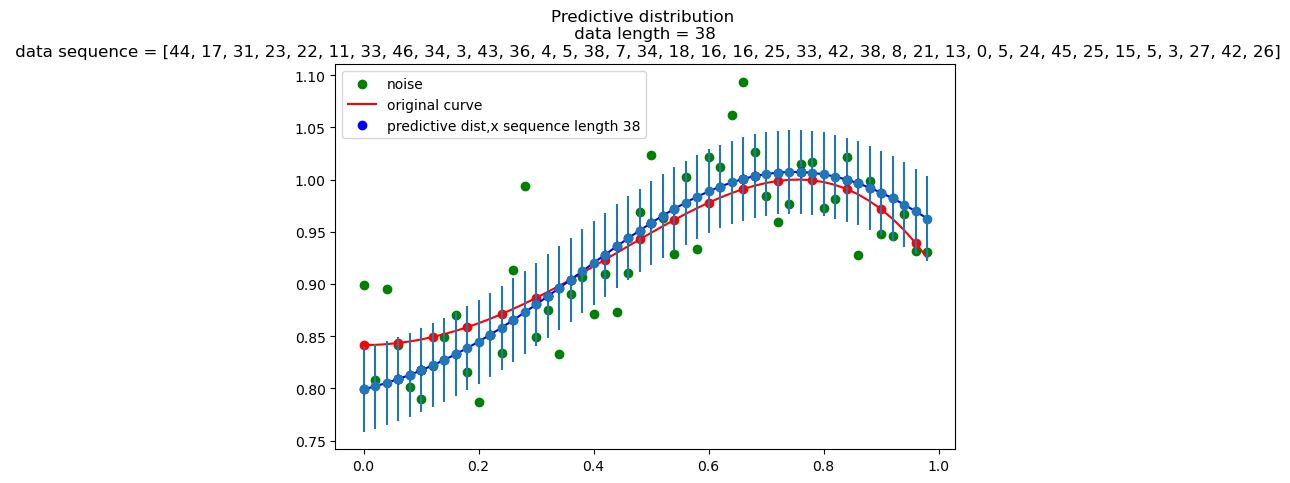

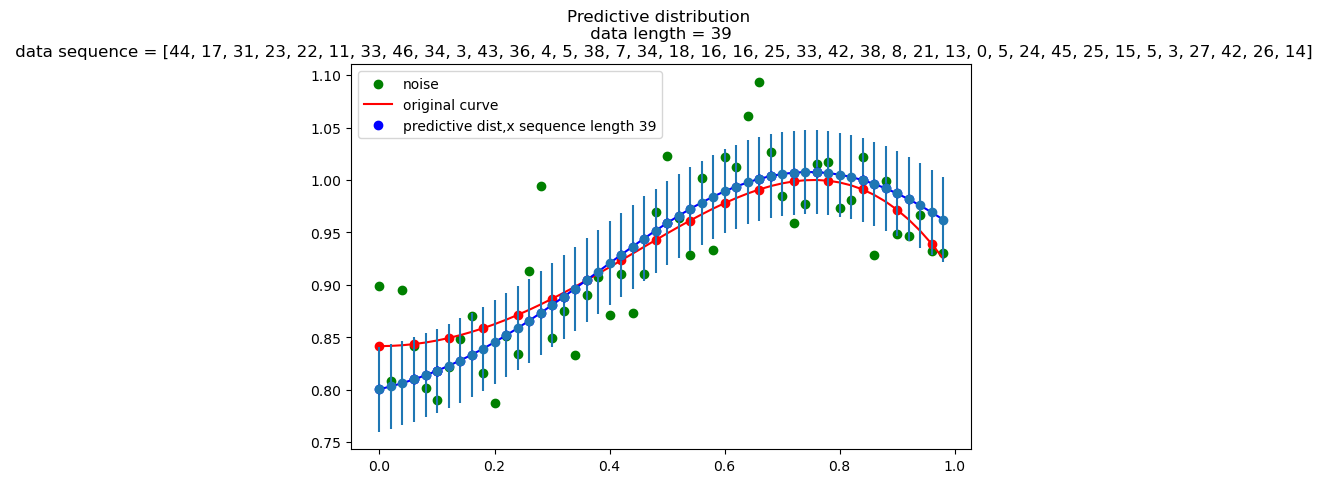

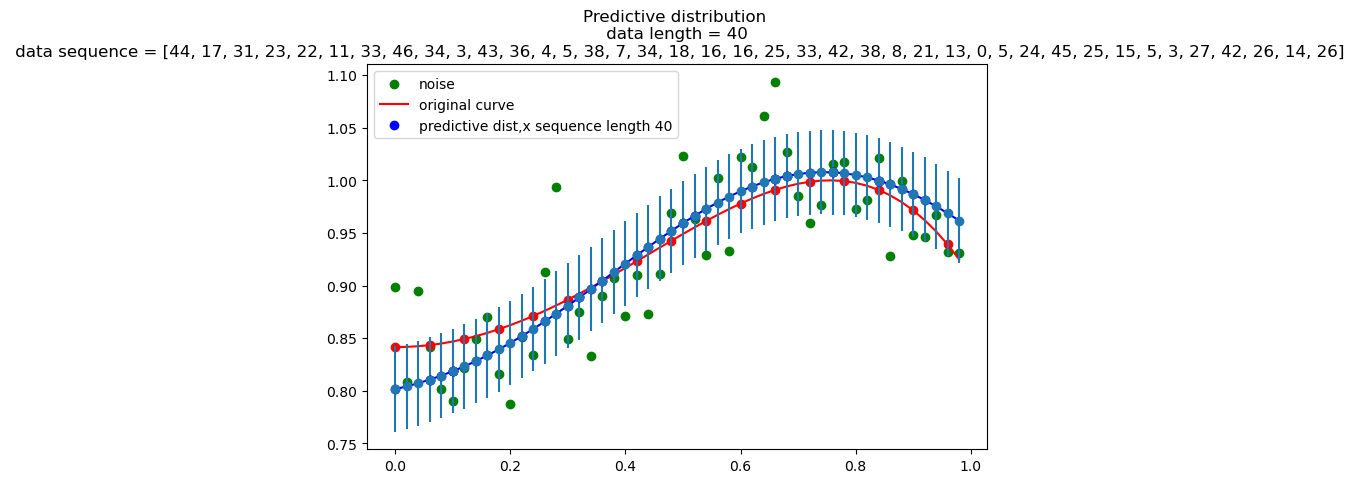

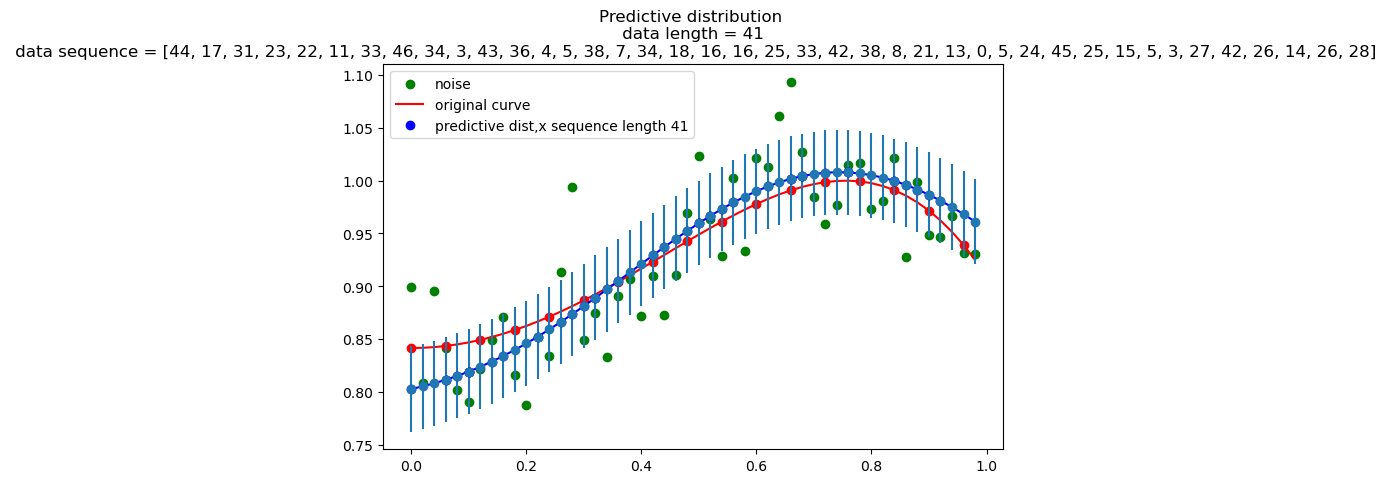

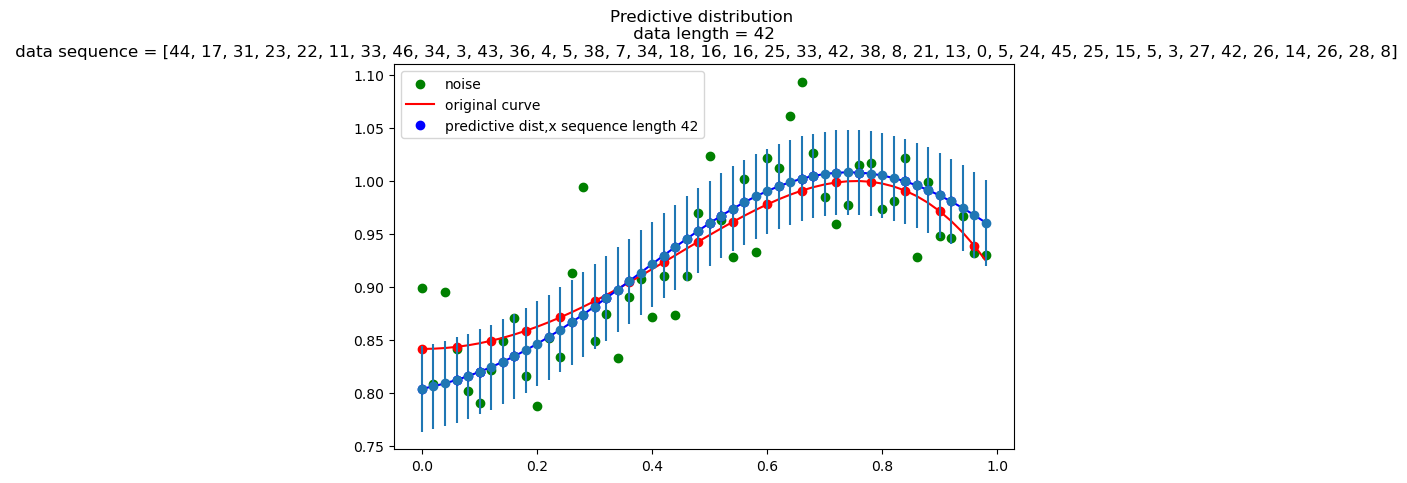

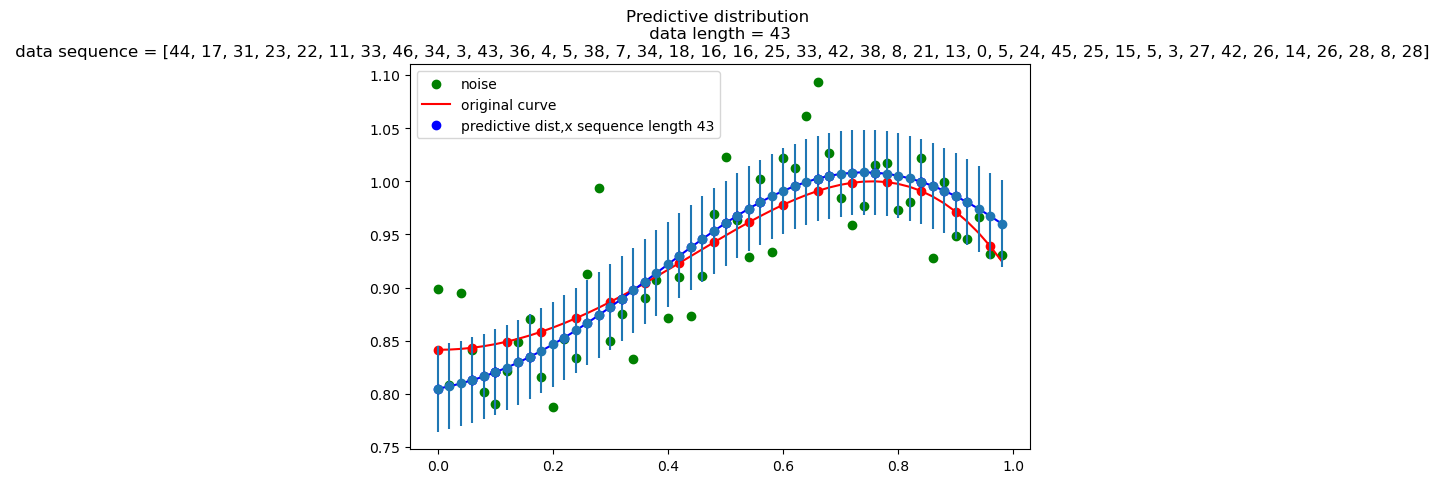

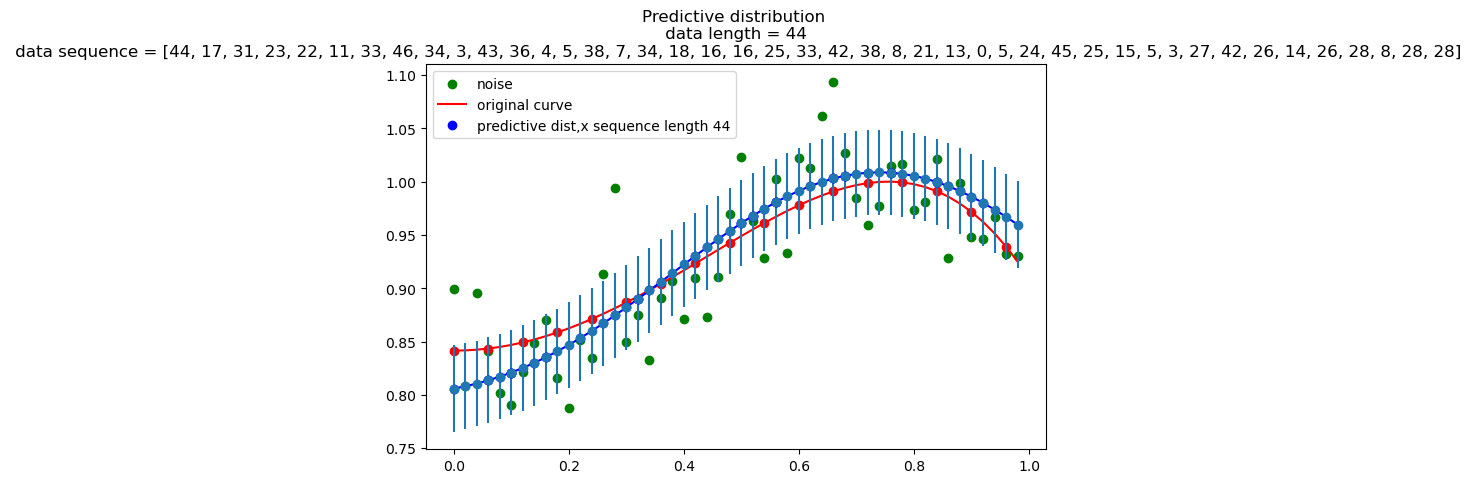

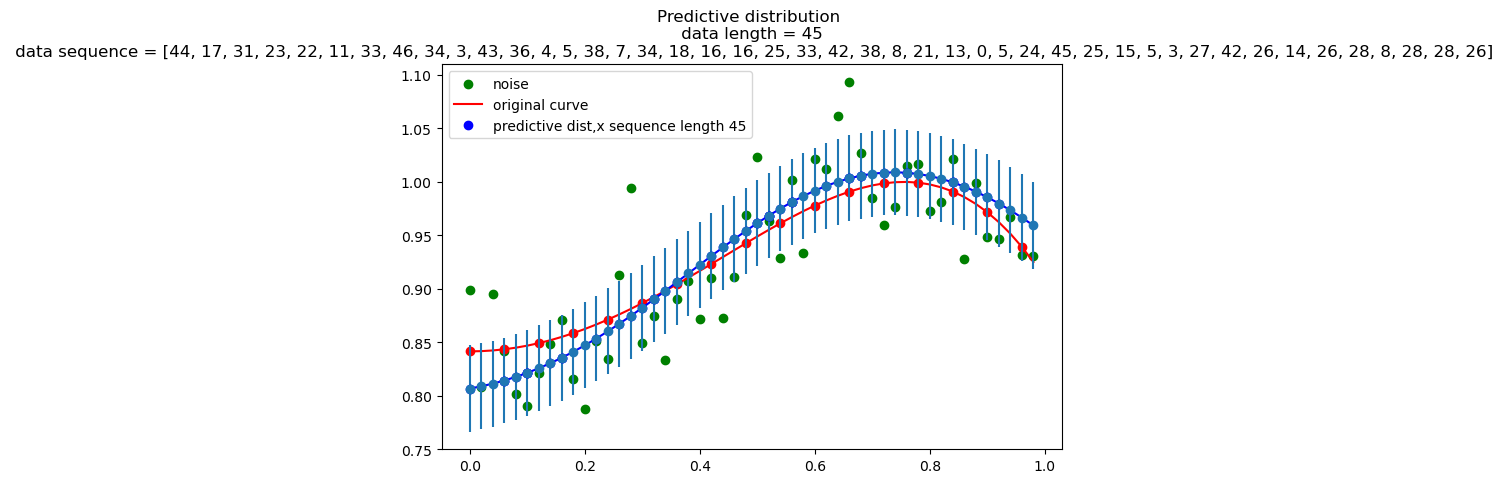

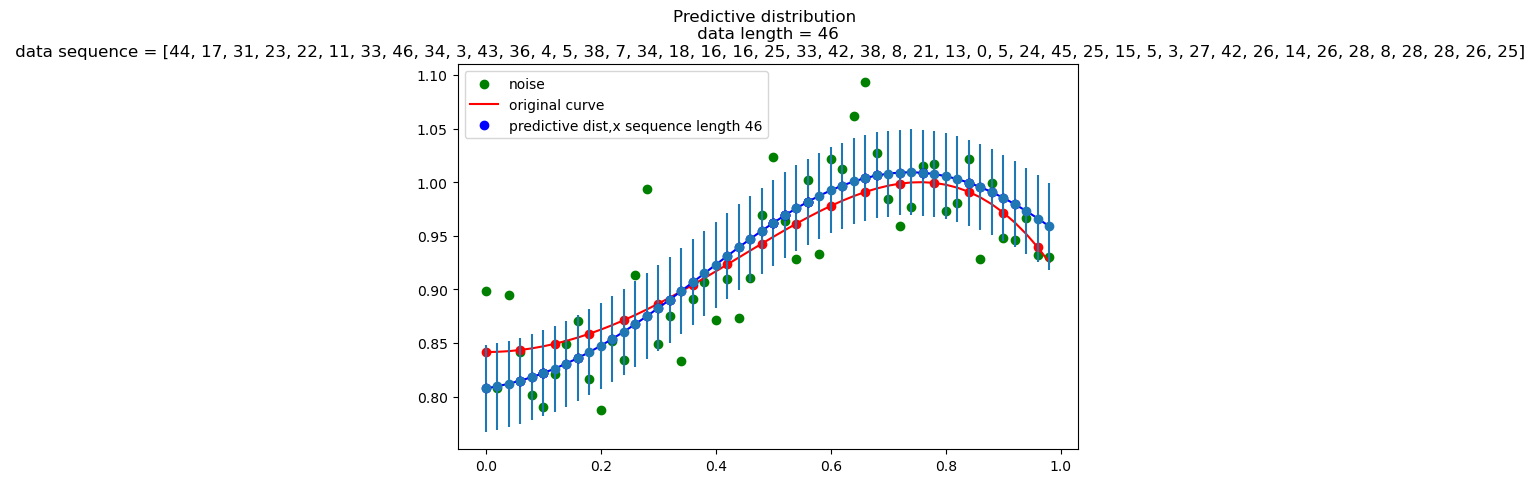

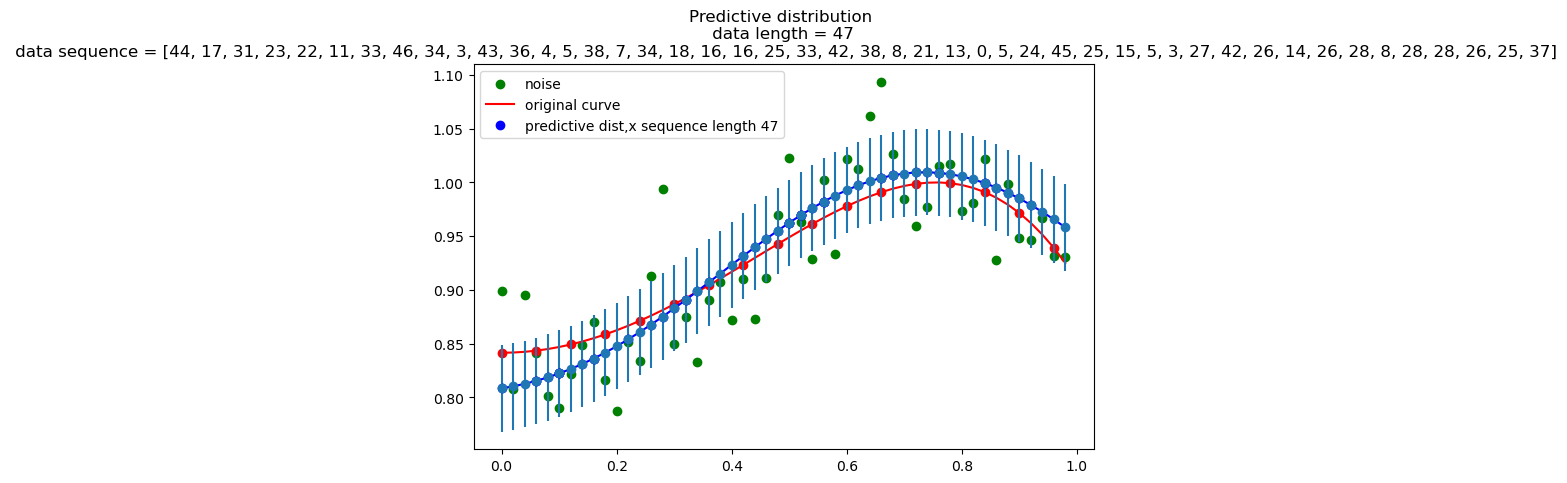

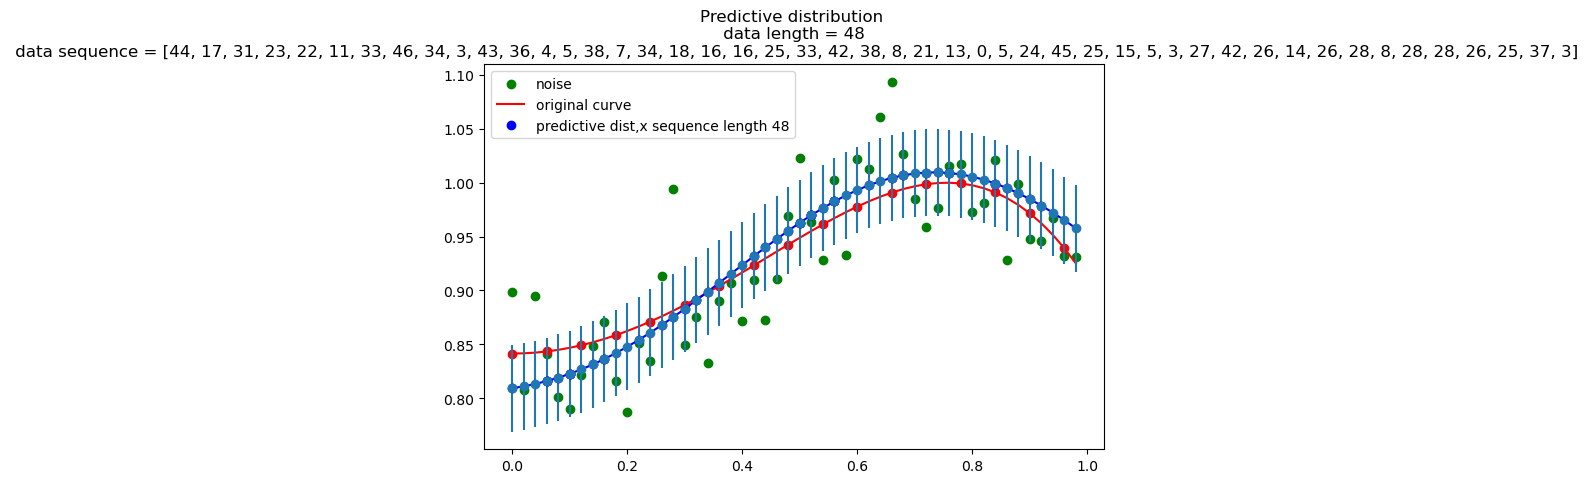

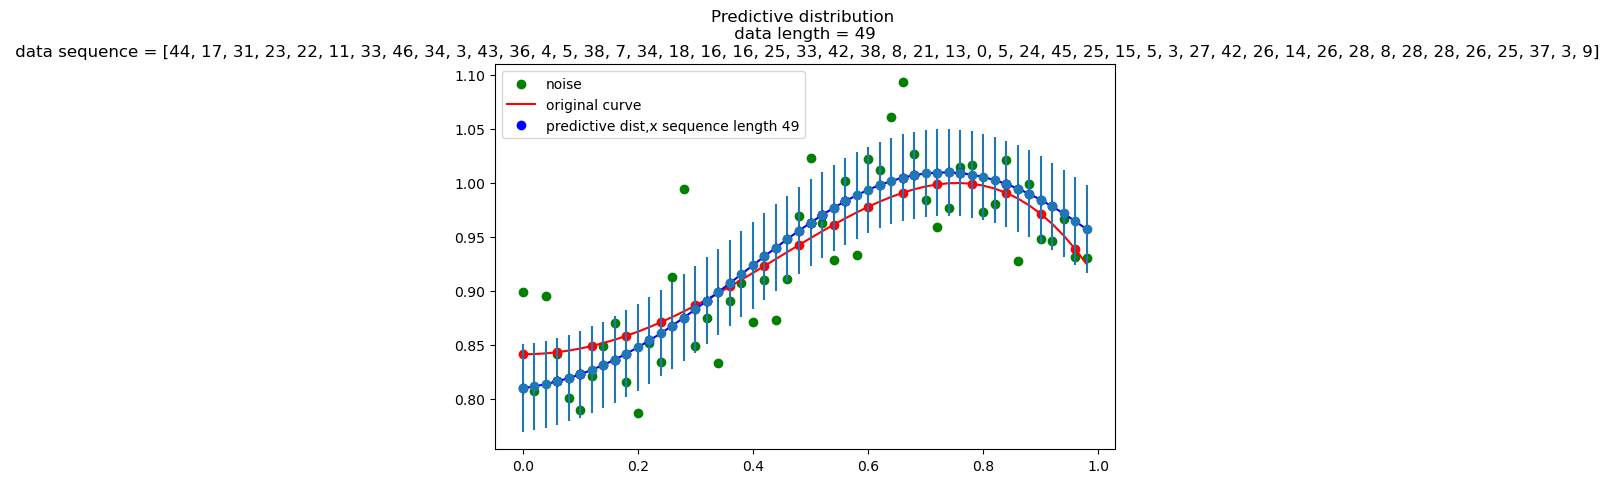

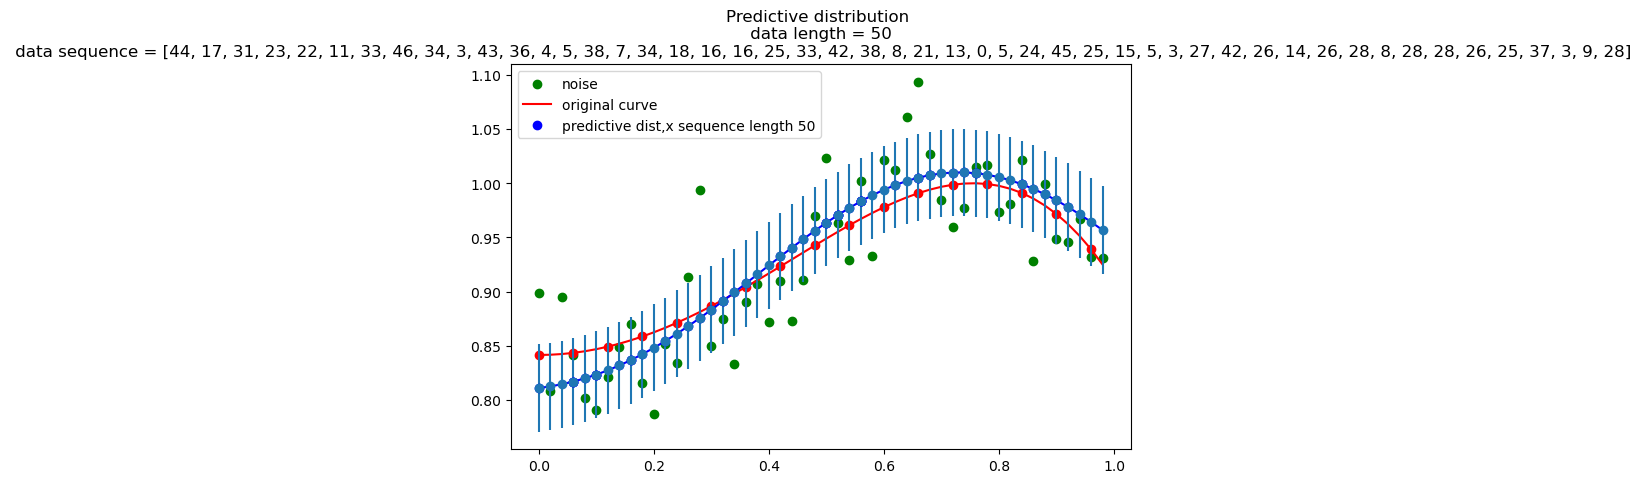

In [40]:
M = 8
s = 0.5
um = np.arange(1/M,1,1/M)
beta = 25
alpha = 0.8
ssn = []
w_bar = []
y_pred=[]
ele_choose = []
x_seq_list = []
y_noise_seq_list = []
for i in range(50):
    # generate random element label
    xiabiao = np.random.randint(0,49)
    ele_choose.append(xiabiao)
    x_seq_list.append(x[xiabiao])
    y_noise_seq_list.append(y_noise[xiabiao])
    x_seq = np.array(x_seq_list)
    y_noise_seq = np.array(y_noise_seq_list)
    
    
    #print(y_noise_seq)
    
    if i == 0:
        ssni,w_bari,y_predi = cal_pred(x_seq,M,s,um,beta,alpha,np.identity(M),np.identity(M))
    else:
        ssni,w_bari,y_predi = cal_pred(x_seq,M,s,um,beta,alpha,ssn[-1],w_bar[-1])
    ssn.append(ssni)
    w_bar.append(w_bari)
    y_pred.append(y_predi)
    std,mean = predictive_dis(beta, x, ssn, w_bar, s, M, i)
    plt.figure(figsize = (8,5))
    plt.plot(x,y,'ro',markevery=3)
    plt.scatter(x,y_noise,color = 'green',label = 'noise')
    plt.plot(x,y,color = 'red',label = 'original curve')
    
    plt.plot(x, mean, 'blue')
    plt.errorbar(x, mean, std ,fmt="o")
    
    plt.plot(x_seq,y_pred[-1],'go',color = 'blue',label = 'predictive dist,x sequence length %s'%(i+1))
    plt.legend(loc = 'best')
    plt.title('Predictive distribution \n data length = %s \n data sequence = %s'%(i+1,str(ele_choose)))